In [1]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', -1)

In [2]:
def get_datetime(date):
    return datetime.date(int(date[:4]), int(date[5:7]), int(date[8:]))

In [3]:
hp = pd.read_csv('/Users/Alex/Dropbox (Personal)/HPResults.csv')
hp = hp[hp.iterations==2010]

In [4]:
A = "['mean_high_T1', 'TWN_high_T1', 'EC_high_T1', 'longitude', 'latitude', 'elevation', 'rolling_normal_high', 'current_temp_T1']"
B = "['mean_high_T1', 'TWN_high_T1', 'EC_high_T1', 'longitude', 'latitude', 'elevation', 'rolling_normal_high', 'current_temp_T1', 'mean_high_T2', 'mean_high_T2_lkah']"
C = "['mean_high_T1', 'TWN_high_T1', 'EC_high_T1', 'longitude', 'latitude', 'elevation', 'rolling_normal_high', 'current_temp_T1', 'mean_high_T2', 'mean_high_T2_lkah', 'mean_high_T1_2ago', 'TWN_high_2ago']"
def identify_fset(x):
    if x == A:
        return 0
    elif x ==B:
        return 1
    elif x ==C:
        return 2
    else:
        return 'UFO'
    
def identify_criterion(x):
    if x == 'mse':
        return 0
    elif x == 'mae':
        return 1
    else:
        return 'UFO'
    
def identify_date(x):
    if x == "2018-12-01":
        return 0
    elif x =="2018-12-02":
        return 1
    elif x =="2018-12-03":
        return 2
    elif x =="2018-12-04":
        return 3
    elif x =="2018-12-05":
        return 4
    elif x =="2018-12-06":
        return 5
    elif x =="2018-12-07":
        return 6
    elif x =="2018-12-08":
        return 7
    elif x =="2018-12-09":
        return 8
    elif x =="2018-12-10":
        return 9
    elif x =="2018-12-11":
        return 10
    elif x =="2018-12-12":
        return 11
    elif x =="2018-12-13":
        return 12
    elif x =="2018-12-14":
        return 13
    elif x =="2018-12-15":
        return 14
    elif x =="2018-12-16":
        return 15
    elif x =="2018-12-17":
        return 16
    elif x =="2018-12-18":
        return 17
    elif x =="2018-12-19":
        return 18
    elif x =="2018-12-20":
        return 19
    elif x =="2018-12-21":
        return 20
    elif x =="2018-12-22":
        return 21
    elif x =="2018-12-23":
        return 22
    elif x =="2018-12-24":
        return 23
    elif x =="2018-12-25":
        return 24
    elif x =="2018-12-26":
        return 25
    elif x =="2018-12-27":
        return 26
    elif x =="2018-12-28":
        return 27
    elif x =="2018-12-29":
        return 28
    elif x =="2018-12-30":
        return 29
    elif x =="2018-12-31":
        return 30
    elif x =="2019-01-01":
        return 31
    else:
        return 'UFO'

In [5]:
hp['fset']= hp['include_only_columns'].apply(identify_fset)
hp['cr']= hp['criterion'].apply(identify_criterion)
hp['sd']= hp['start_date'].apply(identify_date)
hp['perf_TWN']=(hp.TWN_ave-hp.ML_ave)/hp.TWN_ave
hp['perf_EC']=(hp.EC_ave-hp.ML_ave)/hp.EC_ave
hp['perf_Mean']=(hp.perf_EC+hp.perf_TWN)/2

In [6]:
hpa=hp[['time_span','start_date','fset','sd','perf_TWN','cr']]
hpa = hpa.sort_values('perf_TWN')
print(len(hpa))

524


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1125b60b8>,
      dtype=object)

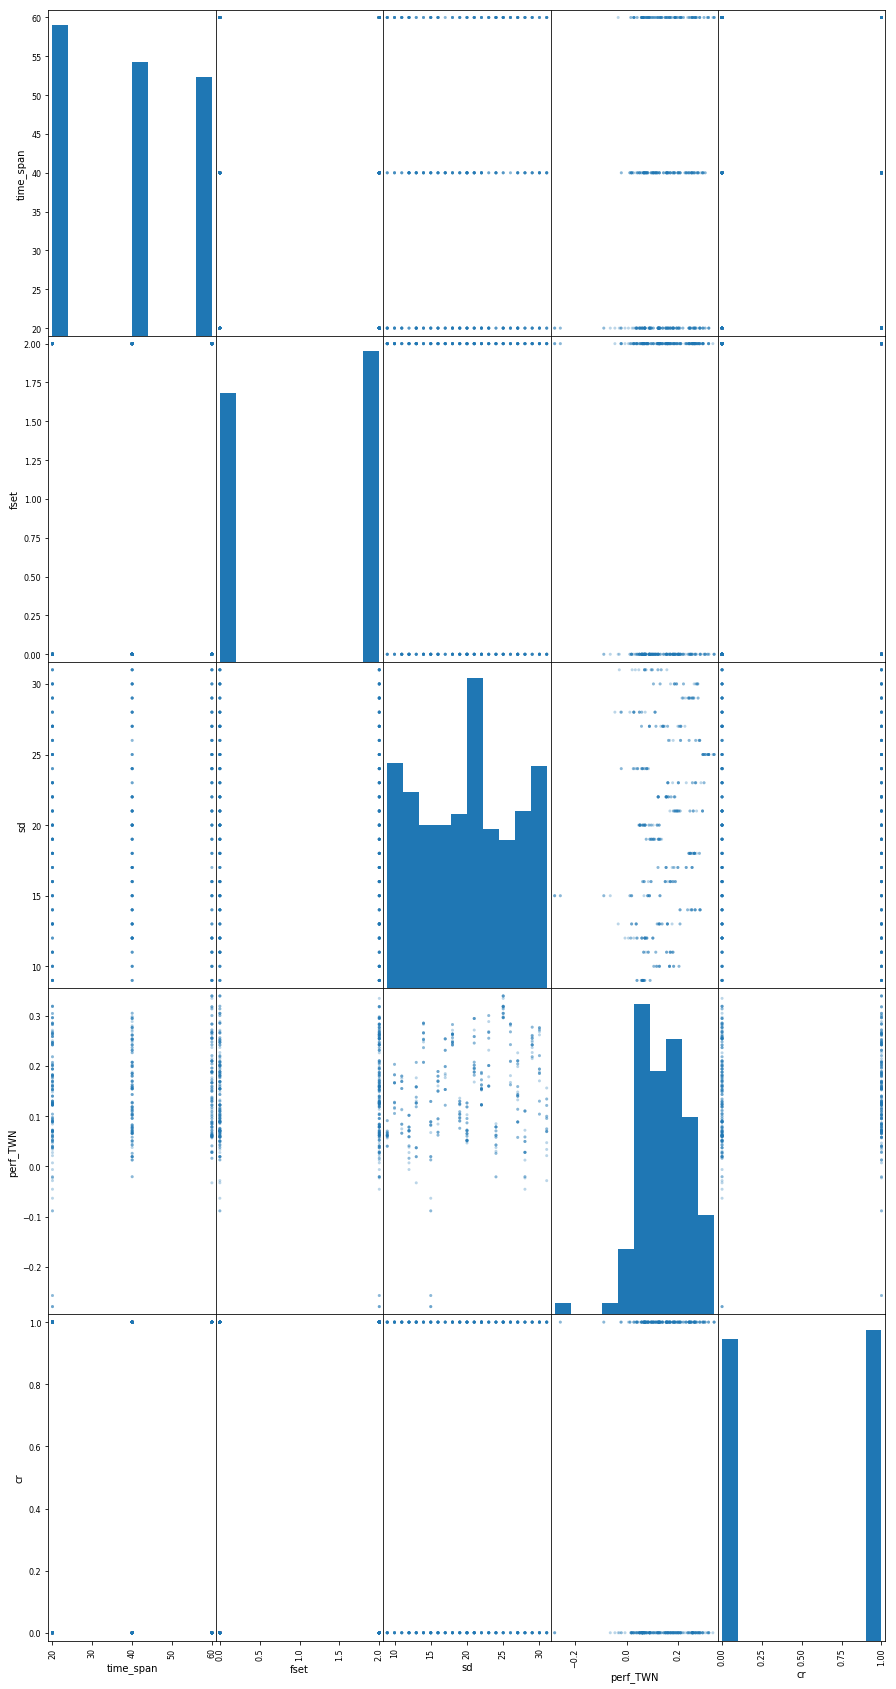

In [7]:
scatter_matrix(hpa, figsize=(15,30), alpha=0.3)

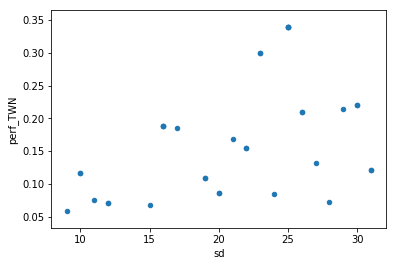

In [23]:
hpa[(hpa.cr==1)&(hpa.fset==0)&(hpa.time_span==60)].plot(x='sd',y='perf_TWN',kind='scatter')

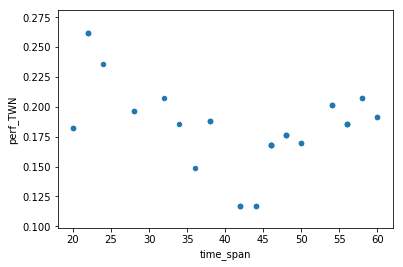

In [57]:
hpa[(hpa.sd==10)&(hpa.fset==2)].plot(x='time_span', y='perf_TWN',kind='scatter')

In [103]:
hpa[(hpa.start_date=='2018-12-11')&(hpa.fset==(0 or 1))&(hpa.TWN_EC_split==0.8)]

AttributeError: 'DataFrame' object has no attribute 'TWN_EC_split'

In [ ]:
for date in hp.start_date.unique():
    best_time_span = hp[hp.start_date==str(get_datetime(date)-datetime.timedelta(1))].sort_values('perf_TWN', ascending=False).head(1)['time_span']
    best_TWN_EC_split = hp[hp.start_date==str(get_datetime(date)-datetime.timedelta(1))].sort_values('perf_TWN', ascending=False).head(1)['TWN_EC_split']
    best_fset = hp[hp.start_date==str(get_datetime(date)-datetime.timedelta(1))].sort_values('perf_TWN', ascending=False).head(1)['fset']
    print(date)
    print(hp[hp.start_date==date].sort_values('perf_TWN', ascending=False).head(6)[['time_span','TWN_EC_split','fset','perf_TWN']])
    print('best from yesterday:')
    print(hp[(hp.start_date==date)&(hp.time_span==best_time_span)&(hp.TWN_EC_split==best_TWN_EC_split)&(hp.fset==best_fset)][['time_span','TWN_EC_split','fset','perf_TWN']])
    print('\n')